In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

In [69]:
image = cv.imread(r'Images/blurimg3.jpg')
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

In [70]:
#количество одинаковых значений Hue в пикселях
HueUnique = np.unique(hsv[:,:,0])
HueUnique = HueUnique.astype('int16')
HueUnique = HueUnique.reshape(HueUnique.size, 1)
hue_values = np.concatenate((HueUnique, np.ones((HueUnique.size, 1), dtype='int32')), axis=1)

for u in range(HueUnique.size):
    hue_values[u, 1] = np.sum(hsv[:,:,0]==hue_values[u, 0])

In [72]:
more_mean = hue_values[:,1]>hue_values.mean()
more_mean = hue_values[more_mean]
print(np.median(more_mean[:,0]))
print(more_mean)

26.5
[[      0 1004010]
 [     15  103169]
 [     16  165588]
 [     17  314036]
 [     18  448194]
 [     19 1196740]
 [     20 2438438]
 [     21 2964883]
 [     22 3845211]
 [     23 2333859]
 [     24 1104918]
 [     25  609270]
 [     26  668432]
 [     27  234470]
 [     28  132771]
 [     29  122560]
 [     30 1419273]
 [     32   80862]
 [     33   60244]
 [     34  186997]
 [     35  364991]
 [     36  465697]
 [     42   77793]
 [     43   80886]
 [     50   91437]
 [     75   64593]]


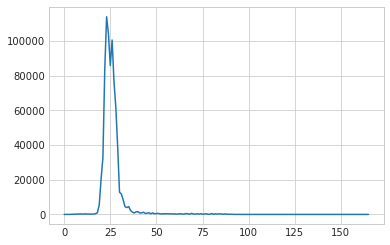

In [22]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()

x = hue_values[:, 0]
y = hue_values[:, 1]
ax.plot(x, y)

In [32]:
#Основная задача сейчас - найти диапозоны с помощью статистики
hue_values[:,1].mean()
#hue_values[:,1][22]-3*hue_values[:,1].std()

119781.06666666667

In [6]:
print(np.unique(hsv[:,:,0]).size)

100


In [40]:
hues = hue_values[:,1]>80 #80 - X
#hues = hue_values[hues]

hues_hsv = hsv.copy()
Hindexs = np.array([1, 1], ndmin=2)
#hsv[:,:,1] = np.where((hsv[:,:,0] in hues), 255, 0)
#hsv[:,:,2] = np.where((hsv[:,:,0] in hues), 255, 0)
#rgb_image = cv.cvtColor(hsv, cv.COLOR_HSV2RGB)


#Наложить полученную маску зн-ий hues на изображение hsv и получить конечные значения

In [8]:
#координаты точек, которых в из hue меньше X - в Hindexs
for u in hues[:,0]:
    temp1 = np.where(hues_hsv[:,:,0]==u)
    print(temp1[0].size)
    temp2 = np.ones((temp1[0].size, 2))
    
    temp2[:,0] = temp2[:,0]*temp1[0]
    temp2[:,1] = temp2[:,1]*temp1[1]
    
    Hindexs = np.concatenate((Hindexs, temp2))

97
157
199
245
267
188
276
253
228
172
170
202
436
940
5429
20243
32644
83251
113839
103959
85787
100440
76633
61829
38989
12830
11743
8256
4420
3941
4535
2224
1344
825
1489
1580
790
896
1268
565
716
940
355
888
300
564
605
326
285
413
365
369
332
341
221
346
130
309
413
133
226
438
422
595
262
176
387
146
430
114
223
380
109
512
344
164
360
262
149
268
146
138


In [7]:
Hindexs = Hindexs.astype('int32')

In [8]:
#Получение координат, которые не вошли в Hindex(то есть hue которых меньше X)
xs = np.arange(hsv.shape[1])
ys = np.arange(hsv.shape[0])
all_indxs = np.array(np.meshgrid(xs, ys)).T.reshape((-1, 2))
neg_indxs = np.delete(all_indxs, Hindexs, axis=0)

In [9]:
#Проблема - не вычитаются значения all_indxs-Hindxs
print(Hindexs.size//2, all_indxs.size//2)

796805 798720


In [31]:
#выделение пикселей, которые попали под прошлые критерии(количество которых больше Х)
nx = neg_indxs[:,0]
ny = neg_indxs[:,1]
hsv[,ny,1] = 0
hsv[nx,ny,2] = 0

rgb_image = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

IndexError: index 768 is out of bounds for axis 0 with size 768

In [ ]:
cv.imshow('', rgb_image)
cv.waitKey(0)

<IPython.core.display.Javascript object>


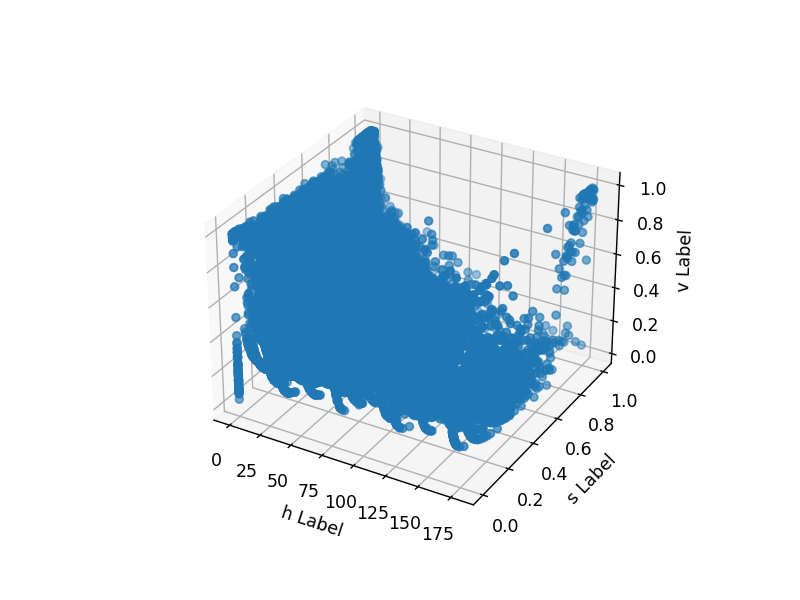

Text(0.5, 0, 'v Label')

In [3]:
ax = plt.axes(projection='3d')
ax.scatter3D(hsv[:,:,0], hsv[:,:,1]/255, hsv[:,:,2]/255)
ax.set_xlabel('h Label')
ax.set_ylabel('s Label')
ax.set_zlabel('v Label')

In [5]:
Hmedian = np.median(hsv[:,:,0])
Smedian = np.median(hsv[:,:,1])/255*100
Vmedian = np.median(hsv[:,:,2])/255*100
print('h: {0}, s: {1}, v: {2}'.format(Hmedian, Smedian, Vmedian))

h: 25.0, s: 41.96078431372549, v: 52.94117647058824
